In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.23.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


In [2]:
vizgen_dir = Path().resolve() / "tutorial_data" / "vizgen_data"

adata = sq.read.vizgen(
    path=vizgen_dir,
    counts_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv",
    meta_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv",
    transformation_file="datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_images_micron_to_mosaic_pixel_transform.csv",
)

adata

AnnData object with n_obs × n_vars = 78329 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [3]:
sc.pp.calculate_qc_metrics(adata, percent_top=(50, 100, 200, 300), inplace=True)

In [4]:
adata.obsm["blank_genes"].to_numpy().sum() / adata.var["total_counts"].sum() * 100

0.3892738837748766

<Axes: title={'center': 'Volume of segmented cells'}, xlabel='volume', ylabel='Count'>

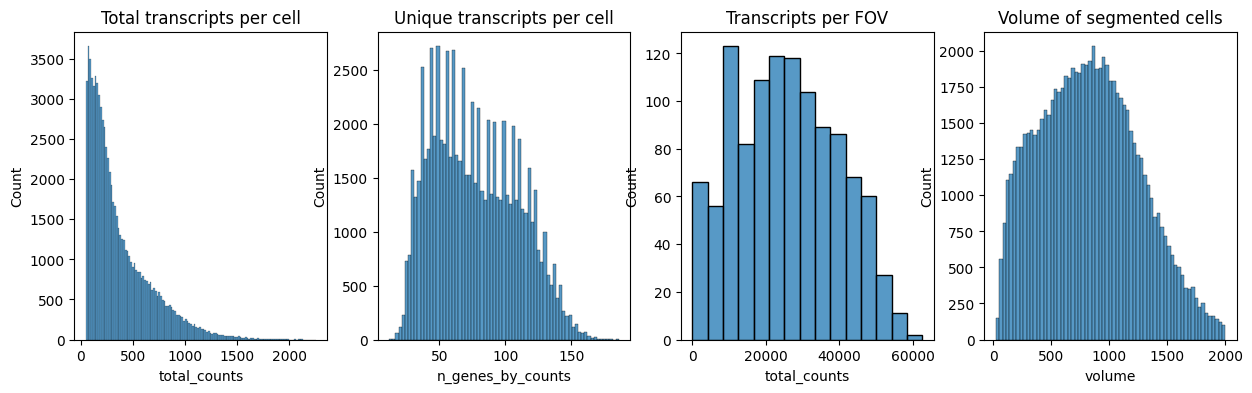

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Volume of segmented cells")
sns.histplot(
    adata.obs["volume"],
    kde=False,
    ax=axs[3],
)

In [6]:
sc.pp.filter_cells(adata, min_counts=10)

In [7]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


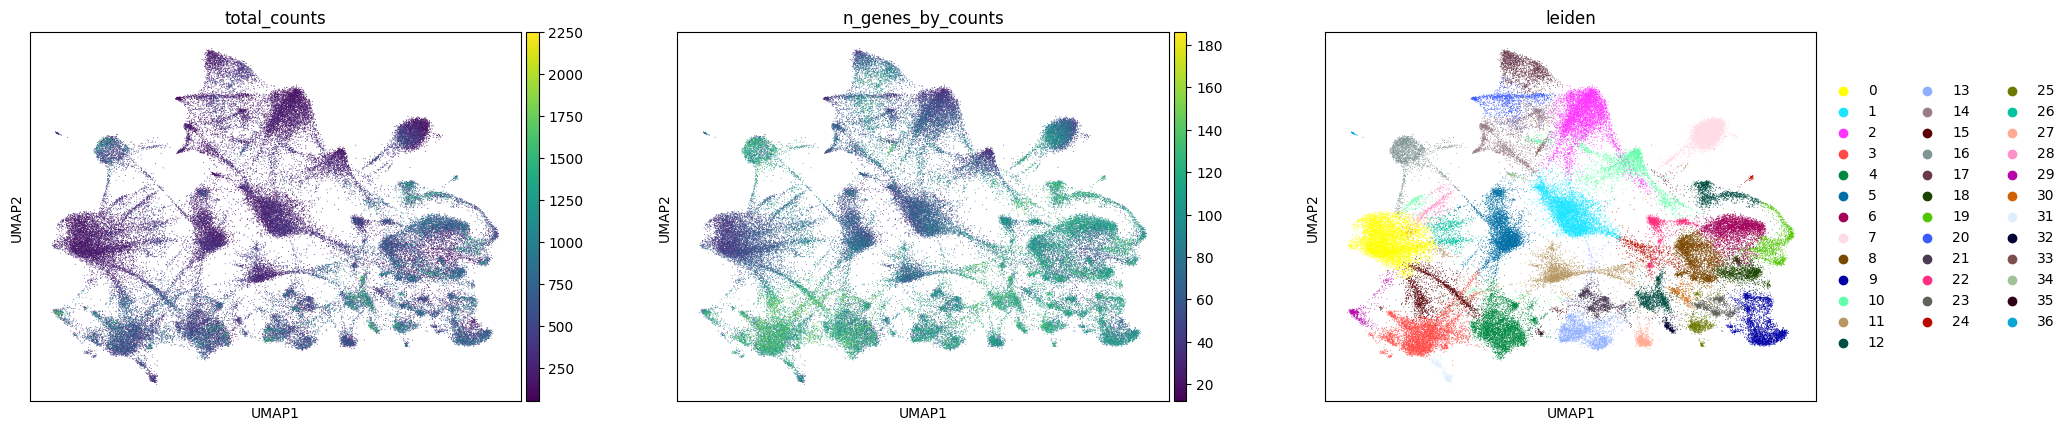

In [8]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.2,
)

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/Users/jzh/mini

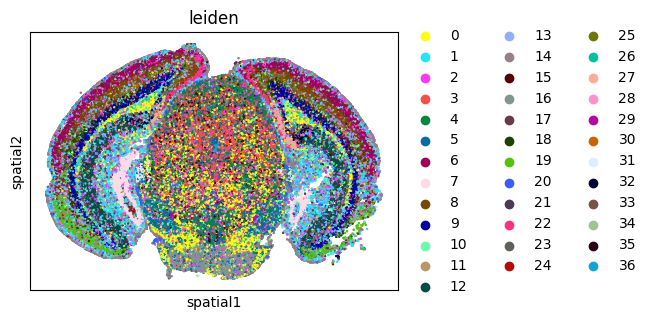

In [9]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

In [10]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [11]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


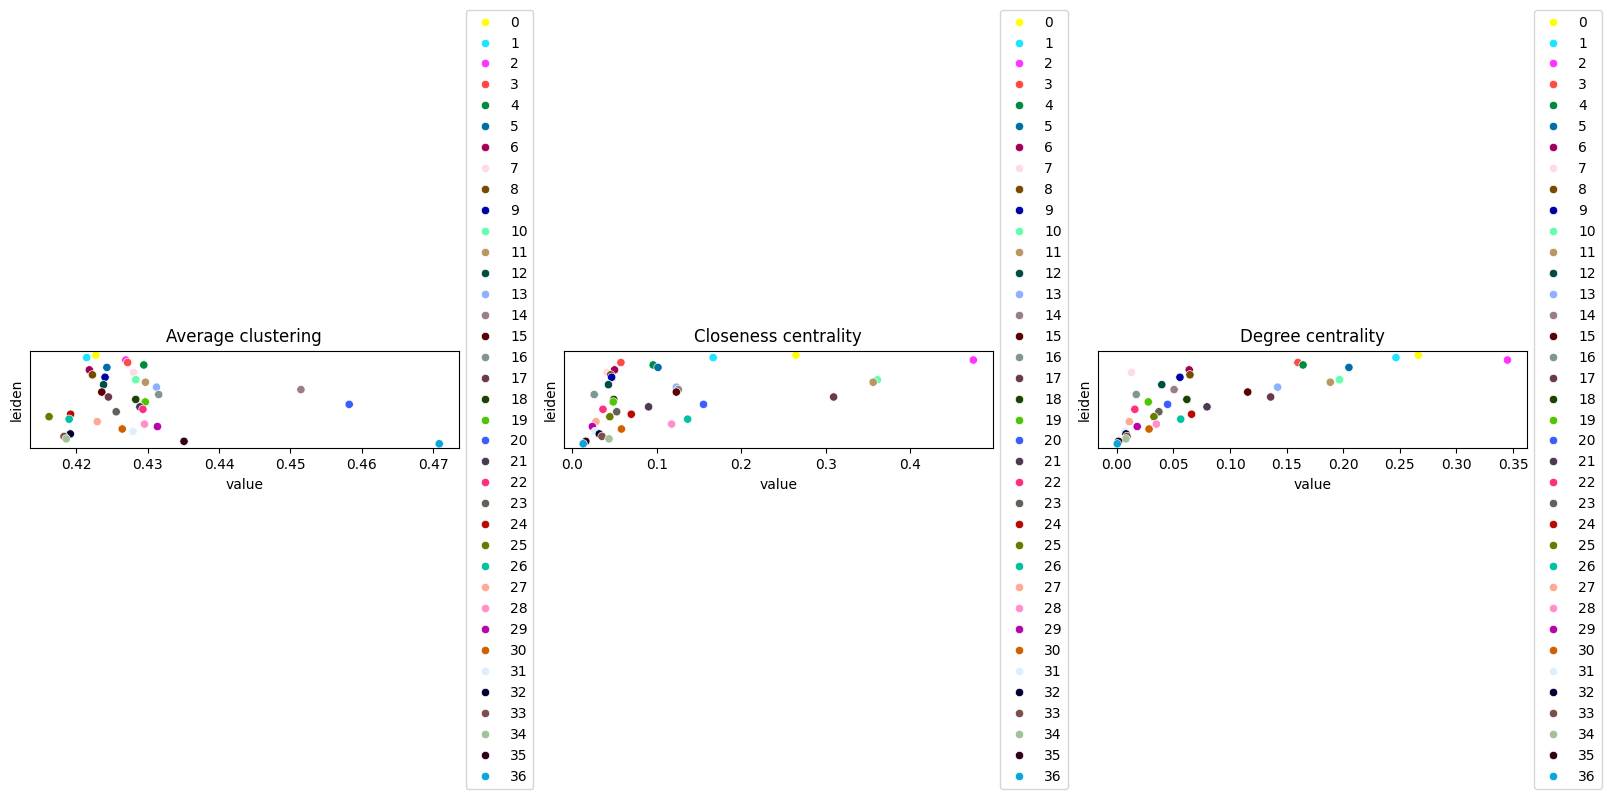

In [12]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(16, 5))

In [13]:
adata_subsample = sc.pp.subsample(adata, fraction=0.5, copy=True)

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
100%|██████████| 210/210 [01:58<00:00,  1.78/s]


/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default val

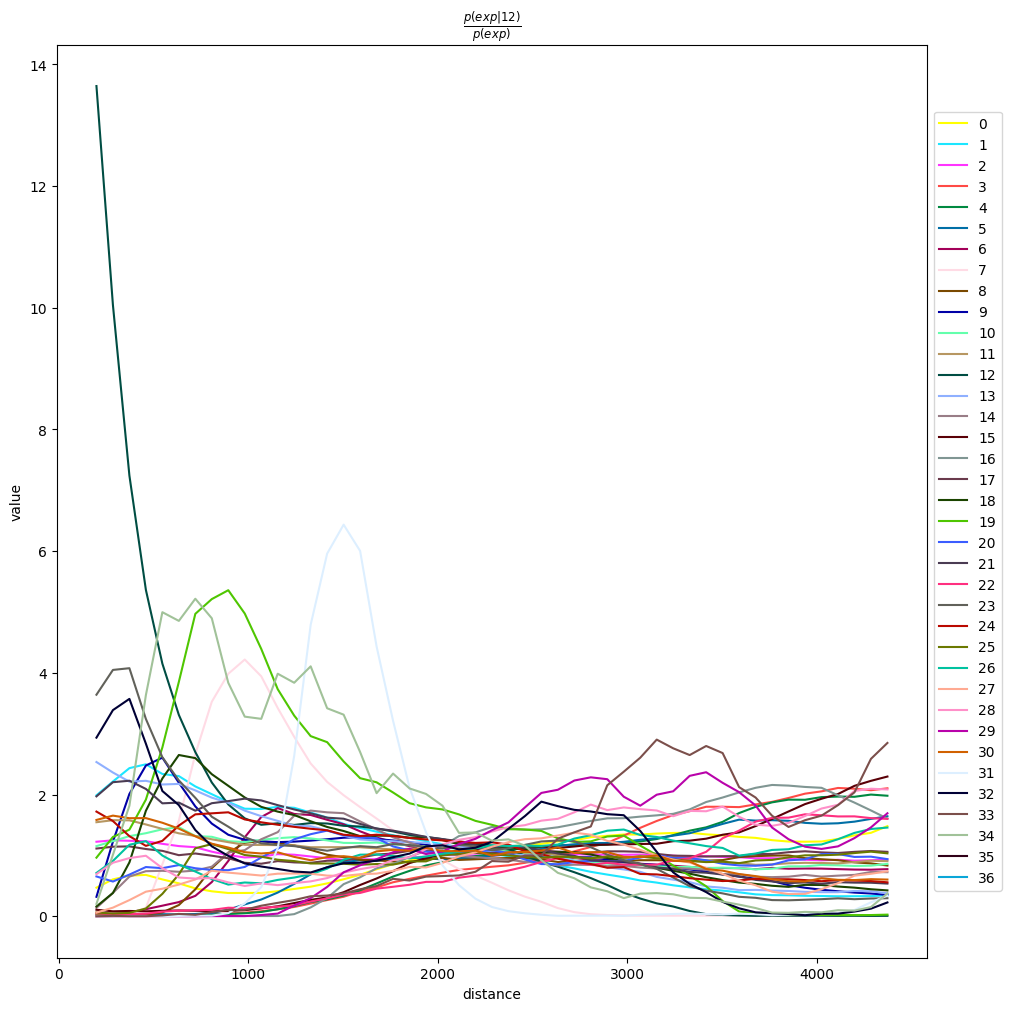

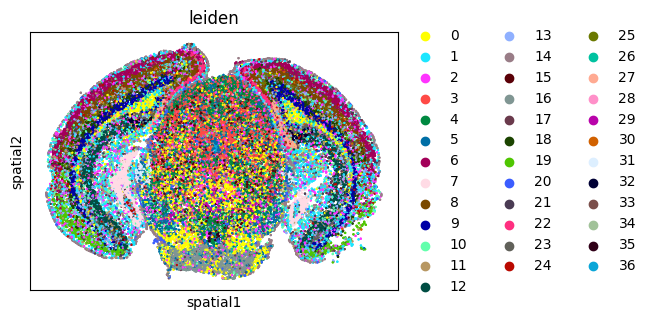

In [14]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

In [15]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
100%|██████████| 1000/1000 [00:11<00:00, 85.27/s]


/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

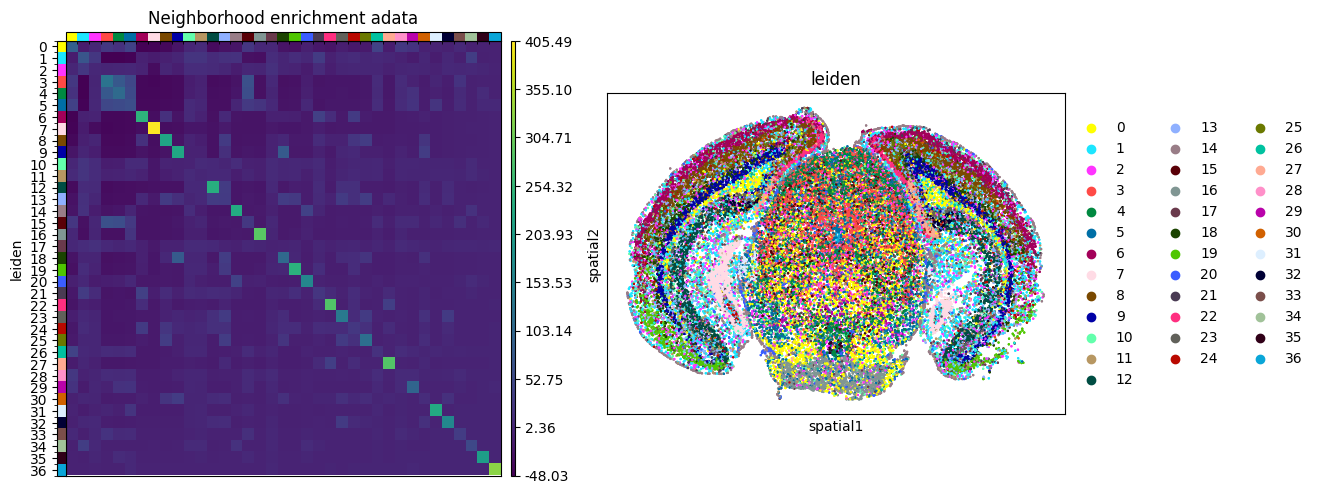

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=2, ax=ax[1])

/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_graph.py:317: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(y="stats", x="bins", ci="sd", alpha=0.01, color="gray", data=res["sims_stat"], ax=ax)
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:388: FutureWarning: is_categorical_dtype

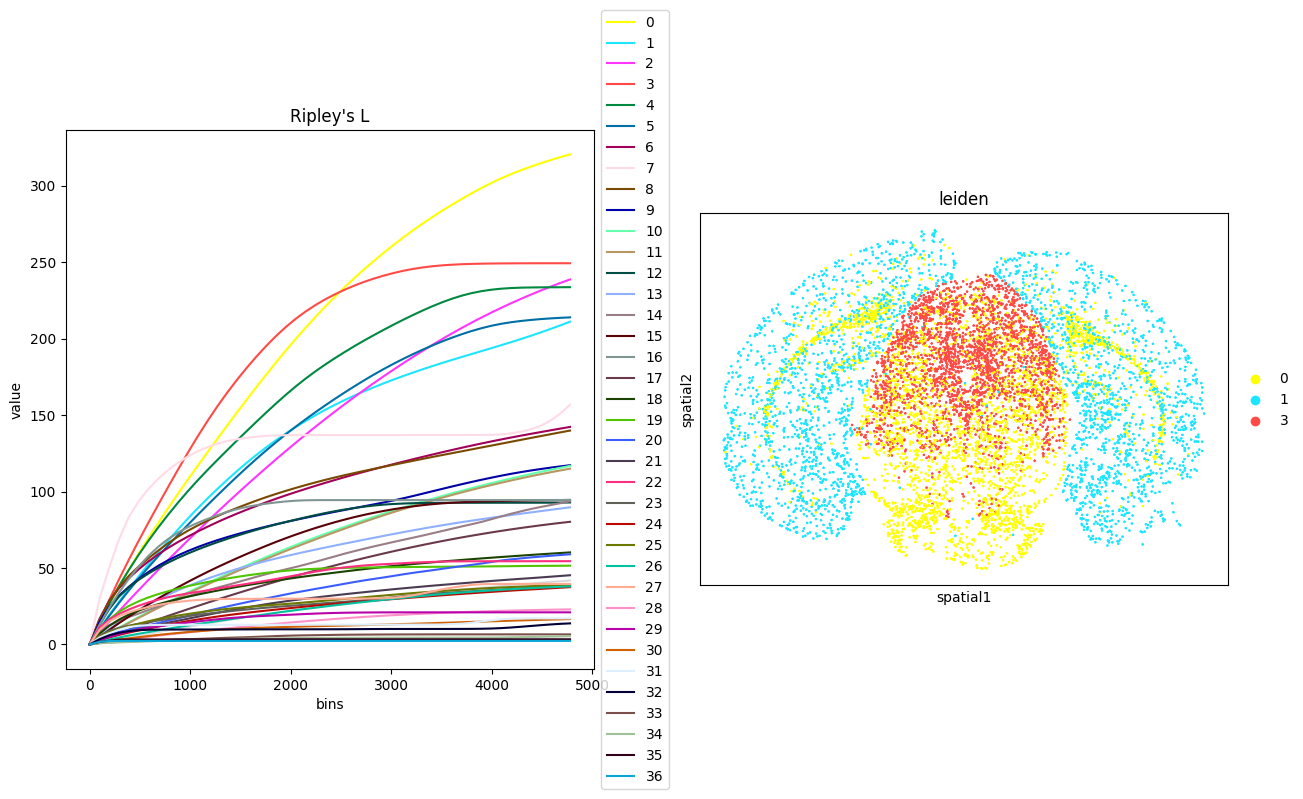

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
mode = "L"

sq.gr.ripley(adata, cluster_key="leiden", mode=mode)
sq.pl.ripley(adata, cluster_key="leiden", mode=mode, ax=ax[0])

sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    groups=["0", "1", "3"],
    shape=None,
    size=2,
    ax=ax[1],
)

In [18]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

100%|██████████| 100/100 [01:48<00:00,  1.08s/]


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Slc17a7,0.699380,0.0,0.000009,0.0,0.009901,0.000020,0.0,0.0,0.012454
Chrm1,0.577472,0.0,0.000009,0.0,0.009901,0.000018,0.0,0.0,0.012454
Gfap,0.573752,0.0,0.000009,0.0,0.009901,0.000021,0.0,0.0,0.012454
Baiap2,0.460600,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012454
Mas1,0.415356,0.0,0.000009,0.0,0.009901,0.000008,0.0,0.0,0.012454
Grin2b,0.411849,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012454
Sstr4,0.401322,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012454
Glp2r,0.393550,0.0,0.000009,0.0,0.009901,0.000010,0.0,0.0,0.012454
Npy2r,0.377881,0.0,0.000009,0.0,0.009901,0.000013,0.0,0.0,0.012454
Gprc5b,0.375281,0.0,0.000009,0.0,0.009901,0.000012,0.0,0.0,0.012454


/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/jzh/miniconda3/envs/brain/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:649: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(color_source_vector):


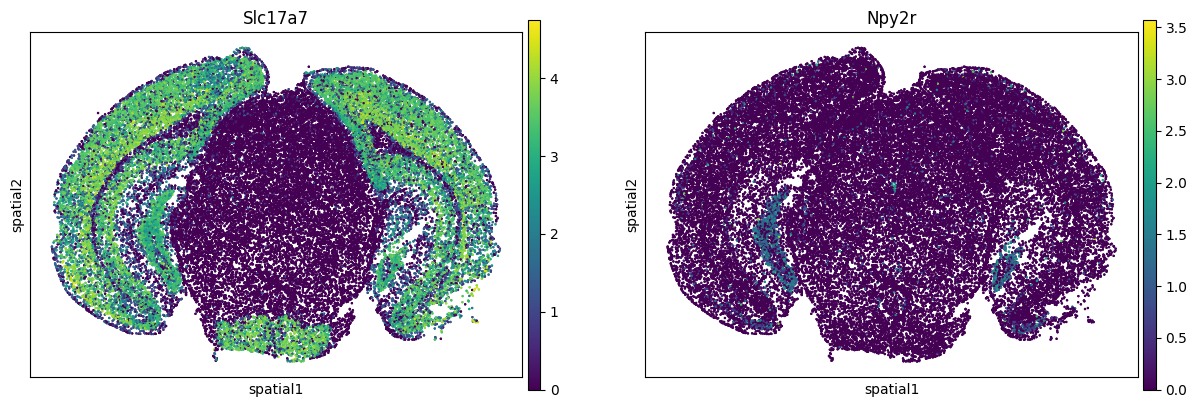

In [19]:
sq.pl.spatial_scatter(
    adata_subsample,
    color=[
        "Slc17a7",
        "Npy2r",
    ],
    shape=None,
    size=2,
    img=False,
)